2022-05-02 Classification learning notes

In [28]:
import tensorflow as tf
print(tf.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2.8.0


Let us first generate some toy datasets for classification purpose

In [11]:
from sklearn.datasets import make_moons
# sklearn provides various random sample generators to build artificial datasets
# More can be found here: https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators
samples = 1000
X,y = make_moons(n_samples=samples, noise=0.02, random_state=100)
circles_df = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "Label": y})
# Check out this article for numpy array slicing https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/
circles_df.head()

,X0,X1,Label
0,0.002835,1.007271,0
1,-0.551413,0.758120,0
2,0.026717,0.283048,1
3,-0.873513,0.473145,0
4,0.085062,0.100487,1


In [14]:
circles_df.Label.value_counts()

0    500
1    500
Name: Label, dtype: int64

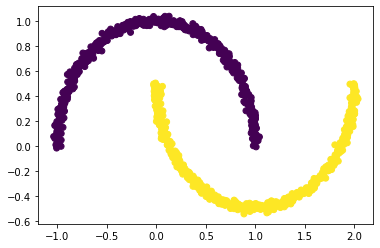

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

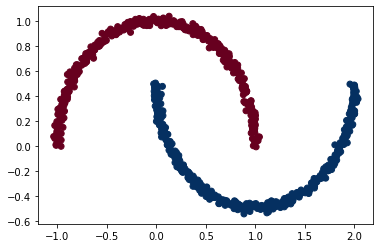

In [26]:
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, cmap=plt.cm.RdBu)

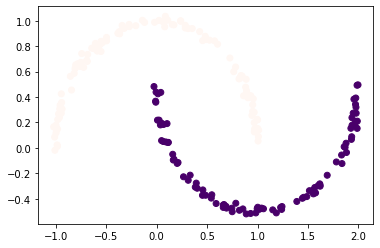

In [27]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdPu)

In [47]:
def plot_decision_boundary(model, data, pred):
    x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("Multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=pred, cmap=plt.cm.RdPu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [40]:
tf.random.set_seed(43)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 1.5290 - accuracy: 0.5004
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7071 - accuracy: 0.4839
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4920
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5021
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4992
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4839
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5049
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4882
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4840
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4857
Epoch 11/

Multiclass classification


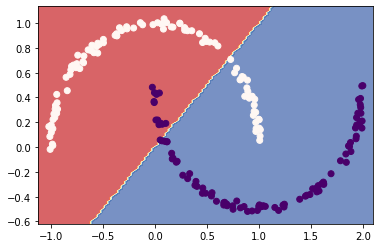

In [48]:
plot_decision_boundary(model, X_test, y_test)